# Gramatik von Grafiken und ggplot2

In dieser mehrteiligen Lektion werden wir uns durch einige Beispiele der Visualisierung mit R arbeiten. Dabei lernen wir eine der am weitest verbreitesten Libraries für Daten Visualisierung in R kennen: `ggplot2`. Diese Lektion wird uns eine kurze Einführung zu dieser Library verschaffen und einige Darstellungsoptionen aufzeigen.

Und damit zur kurzen Einführung von ggplot2!

ggplot2 bietet einige Vorteile:

* Hohe Spezifizierungsmöglichkeiten 
* Sehr flexibel
* Themes zur einfachen Gestalltung
* Ausgereiftes und umfangreiches Grafiksystem
* Viele Nutzer und eine aktive Mailing-Liste
* Sehr viel Online-Hilfe-Möglichkeiten (Stackoverflow, etc.)

Wozu ggplot2 nicht ideal geeignet ist:

* interaktive Grafiken
* Grafik Theory Darstellung
* 3-D Grafiken

Deshalb werden wir später noch weitere Libraries kennenlernen, die diese "Lücken" schließen. Während wir durch die Lektionen mit ggplot2 gehen, könnte dieses [Cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) eine nützliche Referenz sein!

Au0erdem beietet ggplot2 eine tolle [Dokumentation](http://docs.ggplot2.org/current/)! Dabei ist es sehr wahrscheinlich, dass du am Anfang oft auf das Cheatsheet oder in die Dokumentation schaust. Mach dir deshalb keinen Kopf! Sich auf die Dokumentation zu beziehen ist ganz normal, wenn man seine Diagramme erstellt.

# Grammatik von Grafiken

ggplot2 basiert auf der *Grammatik von Grafiken*, dem Konzept dass jede Grafik aus den selben Komponenten erstellt werden kann: ein Datensatz, ein Set an "geoms-visual marks", die Datenpunkte repräsentieren und einem Koordinatensystem. Um Datenwerte anzuzeigen werden diese unter Berücksichtigung bestimmter Darstellungsoptionen (en. aesthetics), wie bspw. Größe, Farbe und Platzeirung, im Koordinatensystem positioniert.

## Ebenen um Visualisierungen zu erstellen

ggplot 2 basiert auf der Grammatik von Grafiken, welche folgendes Paradigma zur Daten Visaulisierung in Ebenen festlegt:
____

<img src="grammar_layers.png" />

___

Wir werden diese Philosophie der Grammatik von Grafiken nicht zu genau besprechen, da die beste Erklärung vom Entwickler selbst - Hadley Wickham - stammt, der darüber ein Paer geschrieben hat, dass ihr hier lesen könnt: [Paper](http://vita.had.co.nz/papers/layered-grammar.pdf).

Die Syntax von ggplot können wir durch einige Beispiele besser verstehen. In deser Lektion werden wir deshalb einige Syntax-Beispiele betrachten und in den folgenden Lektionen einzelne Typen von speziellen Diagrammtypen besprechen. Dazu nutzen wir sowohl qplot() als auch ggplot().

## Daten und Setup

Legen wir los:

In [1]:
# Import ggplot2
library(ggplot2)

Die Allgemeine Syntax sieht wie folgt aus:

    ggplot(data = <default data set>, 
           aes(x = <default x axis variable>,
               y = <default y axis variable>,
               ... <other default aesthetic mappings>),
           ... <other plot defaults>) +

           geom_<geom type>(aes(size = <size variable for this geom>, 
                          ... <other aesthetic mappings>),
                      data = <data for this point geom>,
                      stat = <statistic string or function>,
                      position = <position string or function>,
                      color = <"fixed color specification">,
                      <other arguments, possibly passed to the _stat_ function) +

      scale_<aesthetic>_<type>(name = <"scale label">,
                         breaks = <where to put tick marks>,
                         labels = <labels for tick marks>,
                         ... <other options for the scale>) +

      theme(plot.background = element_rect(fill = "gray"),
            ... <other theme elements>)
            
Was zunächst kompliziert erscheint werden wir Stück für Stück durchgehen. Doch zuerst brauchen wir Daten. Für diese Lektion werden wir einen Imobilien Datensatz verwenden.

In [2]:
library(data.table)
df <- fread('state_real_estate_data.csv')

In [3]:
head(df)

State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
AK,West,20101,224952,160599,64352,28.6,1.481,1.552
AK,West,20102,225511,160252,65259,28.9,1.484,1.576
AK,West,20093,225820,163791,62029,27.5,1.486,1.494
AK,West,20094,224994,161787,63207,28.1,1.481,1.524
AK,West,20074,234590,155400,79190,33.8,1.544,1.885
AK,West,20081,233714,157458,76256,32.6,1.538,1.817


In [4]:
tail(df)

State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
DC,NA,20092,630361,148268,482092,76.5,2.409,2.802
DC,NA,20093,632103,148074,484029,76.6,2.415,2.817
DC,NA,20114,676463,165456,511007,75.5,2.585,3.025
DC,NA,20121,690234,166701,523532,75.8,2.637,3.107
DC,NA,20122,705645,167978,537666,76.2,2.696,3.198
DC,NA,20123,722514,169289,553225,76.6,2.761,3.299


In [5]:
str(df)

Classes ‘data.table’ and 'data.frame':	7803 obs. of  9 variables:
 $ State           : chr  "AK" "AK" "AK" "AK" ...
 $ region          : chr  "West" "West" "West" "West" ...
 $ Date            : int  20101 20102 20093 20094 20074 20081 20082 20083 20084 20091 ...
 $ Home.Value      : int  224952 225511 225820 224994 234590 233714 232999 232164 231039 229395 ...
 $ Structure.Cost  : int  160599 160252 163791 161787 155400 157458 160092 162704 164739 165424 ...
 $ Land.Value      : int  64352 65259 62029 63207 79190 76256 72906 69460 66299 63971 ...
 $ Land.Share..Pct.: num  28.6 28.9 27.5 28.1 33.8 32.6 31.3 29.9 28.7 27.9 ...
 $ Home.Price.Index: num  1.48 1.48 1.49 1.48 1.54 ...
 $ Land.Price.Index: num  1.55 1.58 1.49 1.52 1.89 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [6]:
summary(df)

    State              region               Date         Home.Value    
 Length:7803        Length:7803        Min.   :19751   Min.   : 18763  
 Class :character   Class :character   1st Qu.:19843   1st Qu.: 62235  
 Mode  :character   Mode  :character   Median :19941   Median :108724  
                                       Mean   :19939   Mean   :135313  
                                       3rd Qu.:20033   3rd Qu.:172030  
                                       Max.   :20131   Max.   :862885  
 Structure.Cost     Land.Value     Land.Share..Pct. Home.Price.Index
 Min.   : 17825   Min.   :   938   Min.   : 5.00    Min.   :0.1350  
 1st Qu.: 53776   1st Qu.:  4178   1st Qu.: 5.00    1st Qu.:0.4550  
 Median : 88352   Median :  9478   Median :10.40    Median :0.7830  
 Mean   : 99534   Mean   : 35779   Mean   :18.17    Mean   :0.8695  
 3rd Qu.:134871   3rd Qu.: 38631   3rd Qu.:26.30    3rd Qu.:1.2075  
 Max.   :325595   Max.   :594417   Max.   :81.70    Max.   :2.8930  
 Land.Price.I

# Verwendung von ggplot2
## Kurzes Beispiel mit Histogrammen

Histogramme sind ein toller Weg um schnell die eigenen Daten zu untersuchen. Dazu bieten sich uns einige schnelle Wege, um Histogramme zu erzeugen:

* hist()
* qplot()
* ggplot()

Diese drei Methoden unterscheiden sich hauptsächlich in einem Aspekt: Wir sehen uns einem Trade-off zwischen Einfachheit und Kontrolle gegenübergestellt.

*Hinweis: In R Studio müssen wir print(plot_name) zum Anzeugen verwenden. Außerdem werden die Diagramme in R Studio viel besser als in den Notebooks aussehen.*

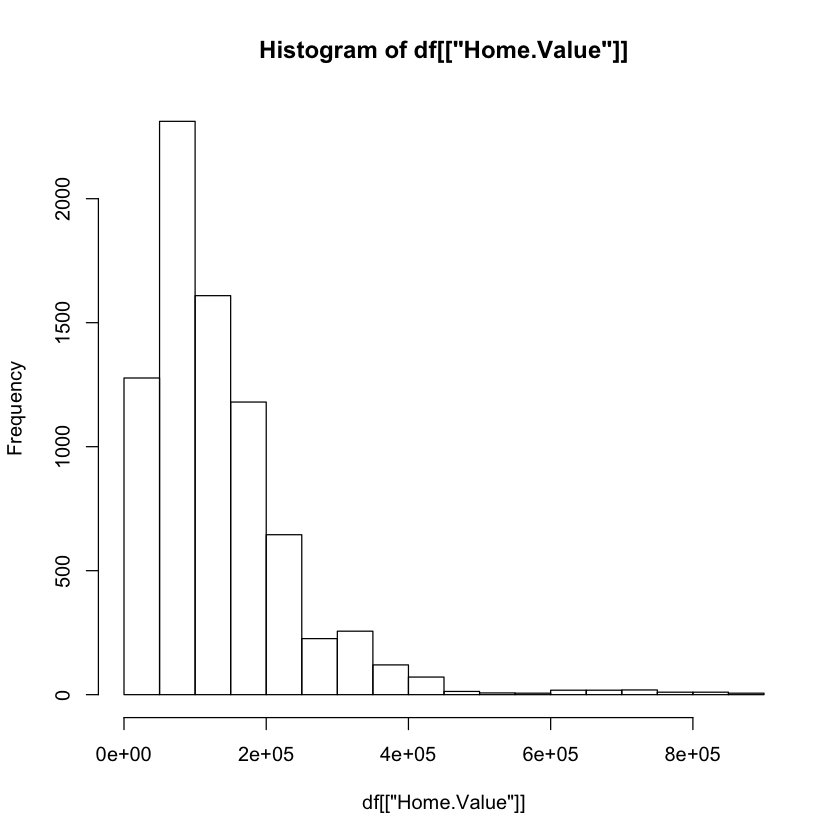

In [7]:
# Eine Spalte an hist() übergeben
hist(df[['Home.Value']])

**qplot nutzen**

Achtet auf die automatische Anpassung von Farbe und breite der Balken.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


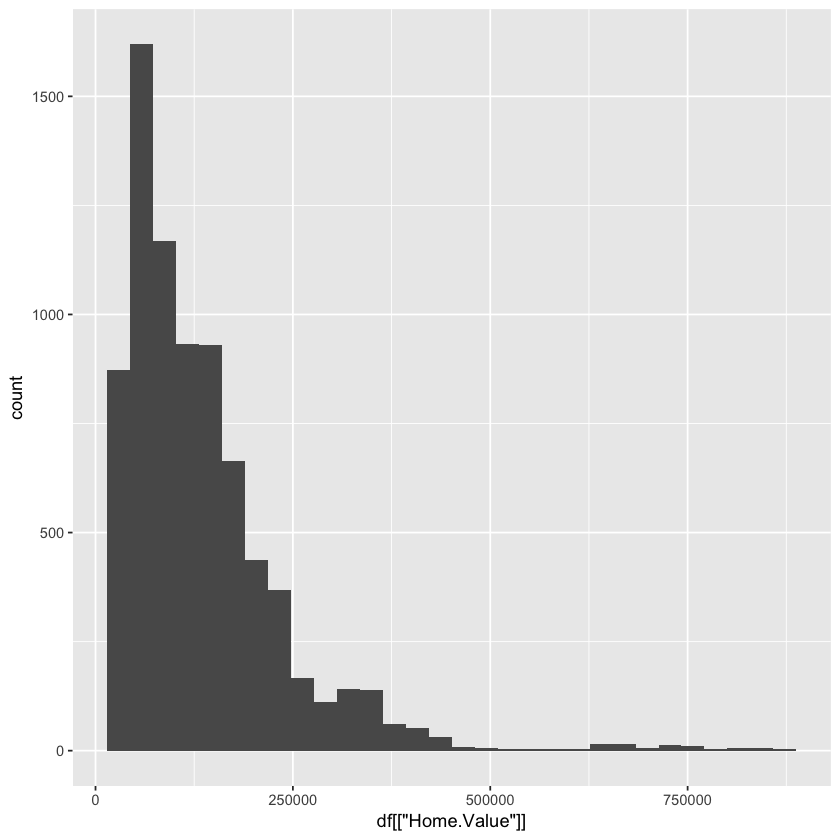

In [8]:
qplot(df[['Home.Value']])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


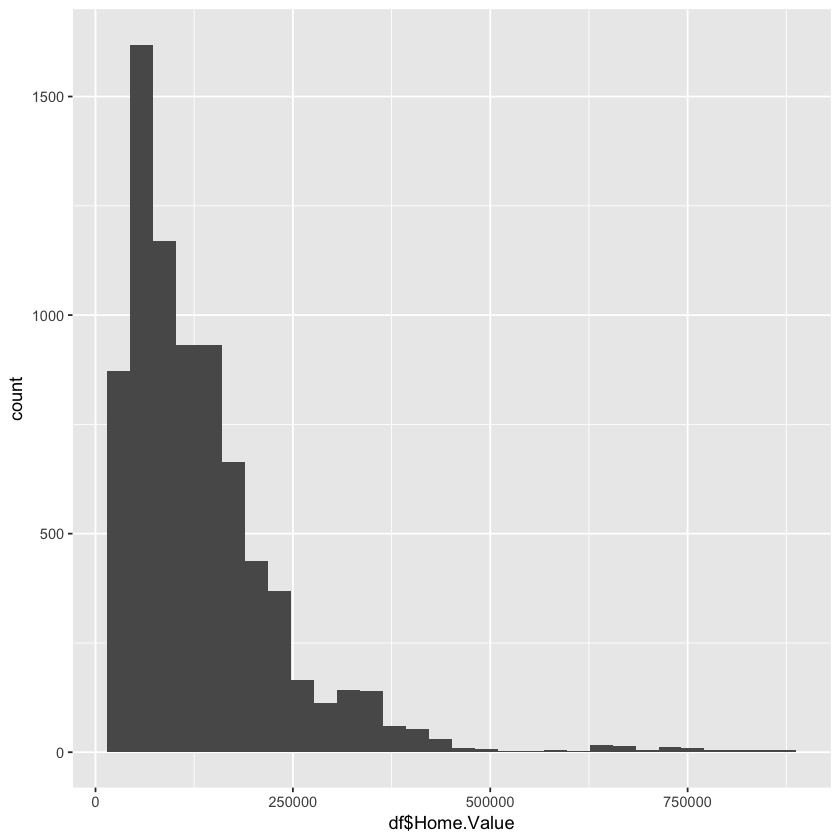

In [9]:
# ggplot bietet uns mehr Gestaltungsmöglichkeiten, ist aber auch etwas komplizierter
ggplot(data = df,aes(df$Home.Value))+geom_histogram()

Welche Variante sollten wir also wählen? Normalerweise wird uns die `qplot()` Funktion eine gute Balance zwischen Einfachheit und Kontrolle bieten. Schauen wir uns die Syntax von qplot etwas genauer an:

## qplot

Die qplot() Funktion kann dazu genutzt werden die üblichsten Diagramme darzustellen. Dabei folgt es diesem Format:

    qplot(x, y, data=, color=, shape=, size=, alpha=, geom=, method=, formula=, facets=, xlim=, ylim= xlab=, ylab=, main=, sub=)

Hier ein Auszug der Dokumentation, der die einzelnen Parameter erklärt:
<table>
				<tr>
				<td><strong>option</strong></td>
				<td><strong>description</strong></td>
				</tr>
				<tr>
				  <td>alpha</td>
				  <td>Alpha transparency for overlapping elements expressed as a fraction between 0 (complete transparency) and 1 (complete opacity)</td>
				  
				</tr>
				<tr>
				  <td>color, shape, size, fill</td>
				  <td>Associates the levels of variable with symbol color, shape, or size. For line plots, color associates levels of a variable with line color. For density and box plots, fill associates fill colors with a variable. Legends are drawn automatically.</td>
				  
				</tr>
				<tr>
				  <td>data</td>
				  <td>Specifies a data frame</td>
				  
				</tr>
				<tr>
				  <td>facets</td>
				  <td>Creates a trellis graph by specifying conditioning variables. Its value is expressed as <em>rowvar</em> ~ <em>colvar</em>. To create trellis graphs based on a single conditioning variable, use <em>rowvar</em>~. or .~<em>colvar</em>)</td>
				  
				</tr>
				<tr>
				  <td>geom</td>
				  <td>Specifies the geometric objects that define the graph type. The geom option is expressed as a character vector with one or more entries. geom values include "point", "smooth", "boxplot", "line", "histogram", "density", "bar", and "jitter". </td>
				  
				</tr>
				<tr>
				  <td>main, sub</td>
				  <td>Character vectors specifying the title and subtitle</td>
				  
				</tr>
				<tr>
				  <td>method, formula</td>
				  <td>If geom="smooth", a loess fit line and confidence limits are added by default. When the number of observations is greater than 1,000, a more efficient smoothing algorithm is employed. Methods include "lm" for regression, "gam" for generalized additive models, and "rlm" for robust regression. The formula parameter gives the form of the fit. 
</br></br>
For example, to add simple linear regression lines, you'd specify geom="smooth", method="lm", formula=y~x. Changing the formula to y~poly(x,2) would produce a quadratic fit. Note that the formula uses the letters x and y, not the names of the variables.
</br></br>
For method="gam", be sure to load the mgcv package. For method="rml", load the MASS package.

</td>
				 
				</tr>
				<tr>
				  <td><em>x</em>, <em>y</em></td>
				  <td>Specifies the variables placed on the horizontal and vertical axis. For univariate plots (for example, histograms), omit <em>y</em></td>
				  
				</tr>
				<tr>
				  <td>xlab, ylab</td>
				  <td>Character vectors specifying horizontal and vertical axis labels</td>
				 
				</tr>
				<tr>
				  <td>xlim,ylim</td>
				  <td>Two-element numeric vectors giving the minimum and maximum values for the horizontal and vertical axes, respectively</td>
				</tr>
				</table>

## Kurzes Anpassungsbeispiel

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 94 rows containing non-finite values (stat_bin).”

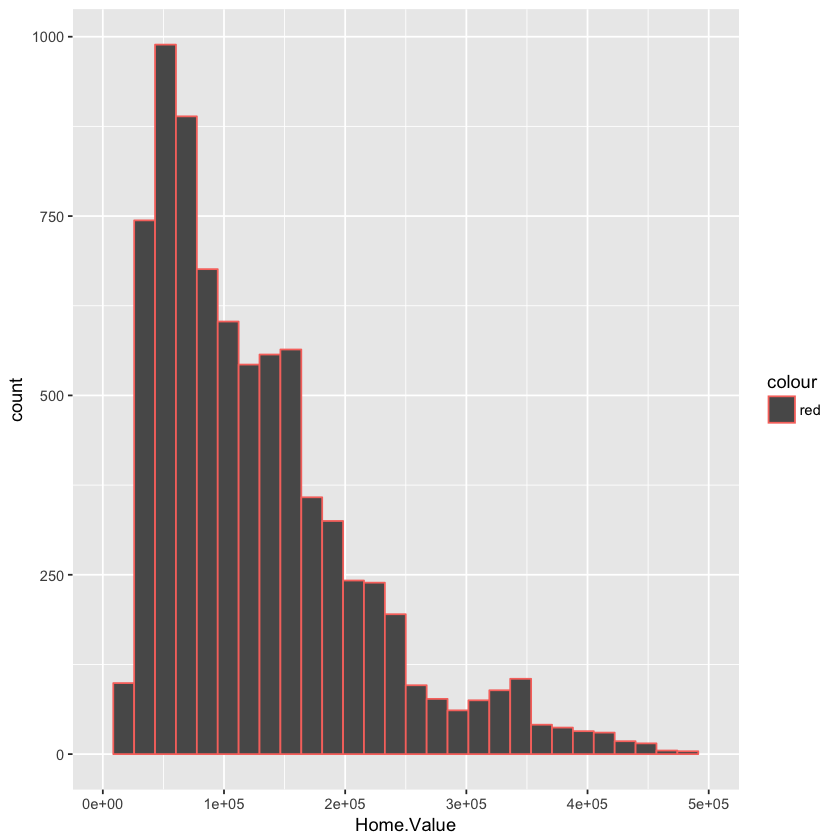

In [10]:
qplot(data=df,x=Home.Value,geom = 'histogram',xlim=c(0,500000), color='red')

## Zusammenfassung

Toll! Hoffentlich wurden die Möglichkeiten von ggplot2 deutlich. Wir werden nachfolgend einzelne Diagrammarten besprechen und sie sowohl mit qplot als auch mit ggplot erzeugen. Das Wissen um ggplot wird uns auch darüber hinaus helfen, wenn wir interaktive Diagramme mit Plotly's Library erzeugen.